# Ordinary Differential Equation

The classic way to solve an ODE is to start with the known initial value of the dependent variable, $y_0 \equiv y(t=0)$, and then use the derivative function $f(x,y)$ to advance the initial value one small step $h$ forward in time to obtain $y_1 \equiv y(t=h)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Suppose we are given an equation $$\frac{dx}{dt}=f(x,t)$$ and an initial condition that fixes the value of $x$ for some $t$. For instance, there exist a DE for $x$ and an initial condition at $t=a$ and asked to make a graph of $x(t)$ for values of $t$ from $a$ to $b$. To do this, we would want to divide the interval from $a$ to $b$ into steps of size $h$ and use

$$ x(t+h) = x(t) + hf(x,t) $$

repeatedly to calculate $x(t)$ and then plot the results.

For example, we want to solve the DE

$$ \frac{dx}{dt} = -x^3 + \sin t $$

with the initial condition $x(t=0)=0$. Consider values of $t \in [0,10]$ in 1000 steps.

In [2]:
def f(x,t):
    func = -x**3 + np.sin(t)
    return func

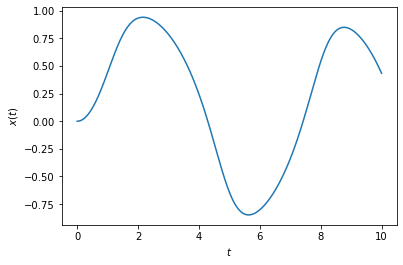

In [8]:
def eulerMethod(a, b, N, x0):
    h = (b-a)/N
    x0 = 0 # Initial condition
    tpoints = np.linspace(a, b, N)
    xpoints = [x0]
    for t in np.arange(0, N-1, 1):
        xpoints.append(xpoints[t] + h*f(xpoints[t], tpoints[t]))
    plt.plot(tpoints, xpoints)
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x(t)$")
    plt.savefig("euler method.png", dpi = 1000)

eulerMethod(0, 10, 1000, 0)

## Runge-Kutta Rule

The fourth-roder Runge-Kutta algorithm, RK4, or its extension with adaptive step size, RK45, has proven itself to be robust and capable of industrial-strength work. We first show the simpler RK2 and just state the result for RK4.

\begin{align}
k_1 &= hf(x,t) \\
k_2 &= hf(x+\tfrac{1}{2}k_1, t+\tfrac{1}{2}h) \\
x(t+h) &= x(t) + k_2
\end{align}

### Second-Order Runge-Kutta Method

Using the same example we used in the previous section,

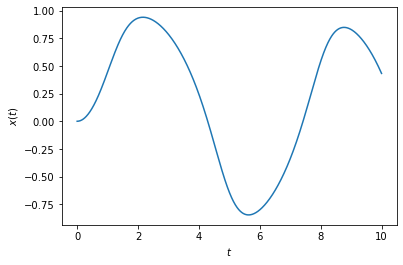

In [10]:
def secondOrder_RK(a, b, N, x0):
    h = (b-a)/N
    x0 = 0
    tpoints = np.linspace(a, b, N)
    xpoints = [x0]
    for t in np.arange(0, N-1, 1):
        k1 = h*f(xpoints[t], tpoints[t])
        k2 = h*f(xpoints[t] + 0.5*k1, tpoints[t] + 0.5*h)
        xpoints.append(xpoints[t] + k2)
    plt.plot(tpoints, xpoints)
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x(t)$")
        
secondOrder_RK(0, 10, 1000, 0)

### Fourth-Order Runge-Kutta Method
Take note of the following approximations

\begin{align}
k_1 &= hf(x,t) \\
k_2 &= hf(x+\tfrac{1}{2}k_1, t+\tfrac{1}{2}h) \\
k_3 &= hf(x+\tfrac{1}{2}k_2, t+\tfrac{1}{2}h) \\
k_4 &= hf(x+k_3, t+h) \\
x(t+h) &= x(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{align}

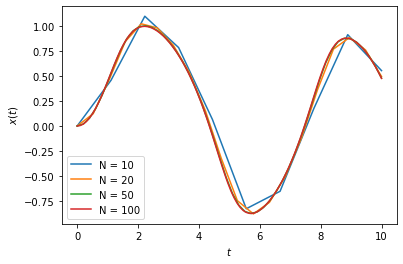

In [41]:
def fourthOrder_RK(a, b, N, x0):
    h = (b-a)/N
    x0 = 0
    tpoints = np.linspace(a, b, N)
    xpoints = [x0]
    for t in np.arange(0, N-1, 1):
        k1 = h*f(xpoints[t], tpoints[t])
        k2 = h*f(xpoints[t] + 0.5*k1, tpoints[t] + 0.5*h)
        k3 = h*f(xpoints[t] + 0.5*k2, tpoints[t] + 0.5*h)
        k4 = h*f(xpoints[t]*k3, tpoints[t] + h)
        xpoints.append(xpoints[t] + (k1+2*k2+2*k3+k4)/6)
    plt.plot(tpoints, xpoints, label = "N = {}".format(n))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$x(t)$")
    
step_number = [10, 20, 50, 100]
for n in step_number:
    fourthOrder_RK(0, 10, n, 0)
    plt.legend()
plt.savefig("RK4 of varying steps.png", dpi = 1000)